In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats
import seaborn as sns
from glob import glob

plt.style.use('seaborn-whitegrid')

In [2]:
def get_ds_language(ds):
    if ds in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'german'
    return 'english'

analysis_dict = {}

def plot_score(score=None, dataset=None, train_test=None, xlim=None, ylim=None):
    filter_str = '*'.join(filter(None,[score or '*', dataset, train_test])) + '*'
    for file in glob(f'dalechall/{filter_str}.csv'):
        f_parts = file.split('_')
        train_test = f_parts[-1]
        ds = f_parts[-2]
        score = '_'.join(f_parts[:-2])
        df_score = pd.read_csv(file)
        bins = np.arange(xlim[0], xlim[1], (xlim[1]-xlim[0])/10) if xlim else 10
        df_score.plot(kind='hist', title=f'{ds} ({train_test})', xlim=xlim, ylim=ylim, bins=bins)
        
def describe_score(score=None, dataset=None, train_test=None):
    filter_str = '*'.join(filter(None,[score or '*', dataset, train_test])) + '*'
    for file in glob(f'dalechall/{filter_str}.csv'):
        f_parts = file.split('_')
        train_test = f_parts[-1]
        ds = f_parts[-2]
        score = '_'.join(f_parts[:-2])
        stats = pd.read_csv(file).describe()
        print(file, stats.loc['mean'].values[0], '+-', stats.loc['std'].values[0])
        
def get_score(score=None, dataset=None, train_test=None):
    filter_str = '*'.join(filter(None,[score or '*', dataset, train_test])) + '*'
    stat_entries = []
    for file in glob(f'dalechall/{filter_str}.csv'):
        f_parts = file.split('_')
        train_test = f_parts[-1]
        ds = f_parts[-2]
        score = '_'.join(f_parts[:-2]).split('\\')[-1]
        stats = pd.read_csv(file).describe()
        stat_entries.append({
            'dataset': ds,
            'score': score,
            'mean': stats.loc['mean'].values[0],
            'std': stats.loc['std'].values[0]
        })
    return pd.DataFrame(stat_entries)

source_dir = '../../zimp_orchestrator/orch/resources'
def sample_top_n_texts(score, dataset, train_test, n=10, ascending=False):
    file = f'lively/{score}_{dataset}_{train_test}.csv'
    df_scores = pd.read_csv(file)
    source_file = os.path.join(source_dir, dataset, train_test + '.csv')
    df_texts = pd.read_csv(source_file)
    top_idx = df_scores.sort_values(df_scores.columns[0], ascending=ascending).index[:n]
    return list(zip(df_scores.loc[top_idx].values, df_texts.text.loc[top_idx].values))
    

In [4]:
df_scores = get_score(train_test='test')
df_scores

,dataset,score,mean,std
0,10K-GNAD,dale_chall,19.064214,1.944766
1,DBP-14,dale_chall,24.969647,6.505667
2,GERMEVAL-2018,dale_chall,17.817275,4.350824
3,GERMEVAL-2020,dale_chall,17.749506,5.245929
4,TREC-6,dale_chall,13.860163,1.979463
5,YELP-5,dale_chall,18.786990,5.969265


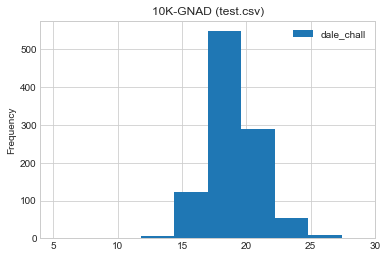

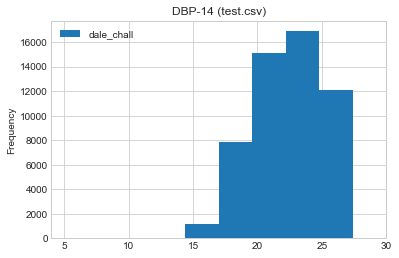

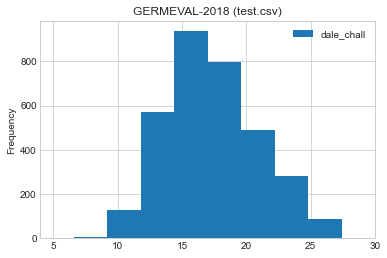

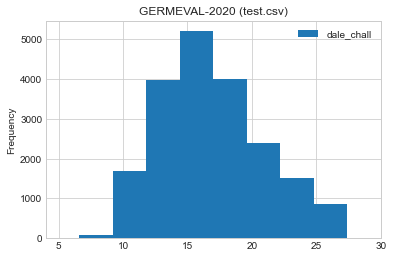

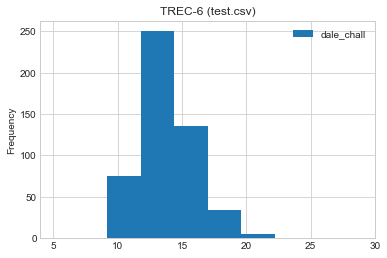

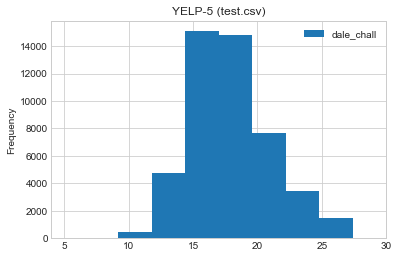

In [6]:
plot_score(score='dale_chall', train_test='test', xlim=(4,30))

In [7]:
describe_score(score='dale_chall')

dalechall\dale_chall_10K-GNAD_test.csv 19.06421360070331 +- 1.9447659342386339
dalechall\dale_chall_10K-GNAD_train.csv 19.029933644988255 +- 1.9518868720897715
dalechall\dale_chall_DBP-14_test.csv 24.96964653371104 +- 6.505667322103555
dalechall\dale_chall_DBP-14_train.csv 24.978280464199965 +- 6.4722298532266995
dalechall\dale_chall_GERMEVAL-2018_test.csv 17.81727463449291 +- 4.350824178565348
dalechall\dale_chall_GERMEVAL-2018_train.csv 18.550916356083064 +- 5.322575817889753
dalechall\dale_chall_GERMEVAL-2020_test.csv 17.749505929920915 +- 5.245928943193813
dalechall\dale_chall_GERMEVAL-2020_train.csv 17.789058626073402 +- 5.264450340294497
dalechall\dale_chall_TREC-6_test.csv 13.860163483823365 +- 1.9794633589037982
dalechall\dale_chall_TREC-6_train.csv 15.28593567550162 +- 2.7212068874074946
dalechall\dale_chall_YELP-5_test.csv 18.786990003814207 +- 5.969265137650309
dalechall\dale_chall_YELP-5_train.csv 18.792326573863186 +- 6.202214028817076
